In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
import warnings
warnings.filterwarnings('ignore') # We can suppress the warnings

# reading the dataset
movies = pd.read_csv("movies.csv")

In [2]:
print(movies.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8024 entries, 0 to 8023
Data columns (total 22 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   imdb_title_id          8024 non-null   object 
 1   title                  8024 non-null   object 
 2   original_title         8024 non-null   object 
 3   year                   8024 non-null   int64  
 4   date_published         8024 non-null   object 
 5   genre                  8024 non-null   object 
 6   duration               8024 non-null   int64  
 7   country                8024 non-null   object 
 8   language               8024 non-null   object 
 9   director               8024 non-null   object 
 10  writer                 8024 non-null   object 
 11  production_company     8024 non-null   object 
 12  actors                 8024 non-null   object 
 13  description            8024 non-null   object 
 14  avg_vote               8024 non-null   float64
 15  vote

In [3]:
movies.head()

,imdb_title_id,title,original_title,year,date_published,genre,duration,country,language,director,...,actors,description,avg_vote,votes,budget,usa_gross_income,worlwide_gross_income,metascore,reviews_from_users,reviews_from_critics
0,tt0002101,Cleopatra,Cleopatra,1912,1912-11-13,"Drama, History",100,USA,English,Charles L. Gaskill,...,"Helen Gardner, Pearl Sindelar, Miss Fielding, ...",The fabled queen of Egypt's affair with Roman ...,5.2,446,$ 45000,0,0,0.0,25.0,3.0
1,tt0002199,"From the Manger to the Cross; or, Jesus of Naz...","From the Manger to the Cross; or, Jesus of Naz...",1912,1913,"Biography, Drama",60,USA,English,Sidney Olcott,...,"R. Henderson Bland, Percy Dyer, Gene Gauntier,...","An account of the life of Jesus Christ, based ...",5.7,484,0,0,0,0.0,13.0,5.0
2,tt0002461,Richard III,Richard III,1912,1912-10-15,Drama,55,"France, USA",English,"André Calmettes, James Keane",...,"Robert Gemp, Frederick Warde, Albert Gardner, ...",Richard of Gloucester uses manipulation and mu...,5.5,225,$ 30000,0,0,0.0,8.0,1.0
3,tt0003167,Amore di madre,"Home, Sweet Home",1914,1914-05-17,Drama,55,USA,English,D.W. Griffith,...,"Henry B. Walthall, Josephine Crowell, Lillian ...",John Howard Payne at his most miserable point ...,5.8,187,0,0,0,0.0,6.0,0.0
4,tt0003471,Traffic in Souls,Traffic in Souls,1913,1913-11-24,"Crime, Drama",88,USA,English,George Loane Tucker,...,"Jane Gail, Ethel Grandin, William H. Turner, M...","A woman, with the aid of her police officer sw...",6.0,552,$ 5700,0,0,0.0,14.0,11.0


Data Exploration

In [4]:
movies_numeric = movies.select_dtypes(include=['float64', 'int64'])
movies_numeric.head()

,year,duration,avg_vote,votes,metascore,reviews_from_users,reviews_from_critics
0,1912,100,5.2,446,0.0,25.0,3.0
1,1912,60,5.7,484,0.0,13.0,5.0
2,1912,55,5.5,225,0.0,8.0,1.0
3,1914,55,5.8,187,0.0,6.0,0.0
4,1913,88,6.0,552,0.0,14.0,11.0


<Figure size 1440x720 with 0 Axes>

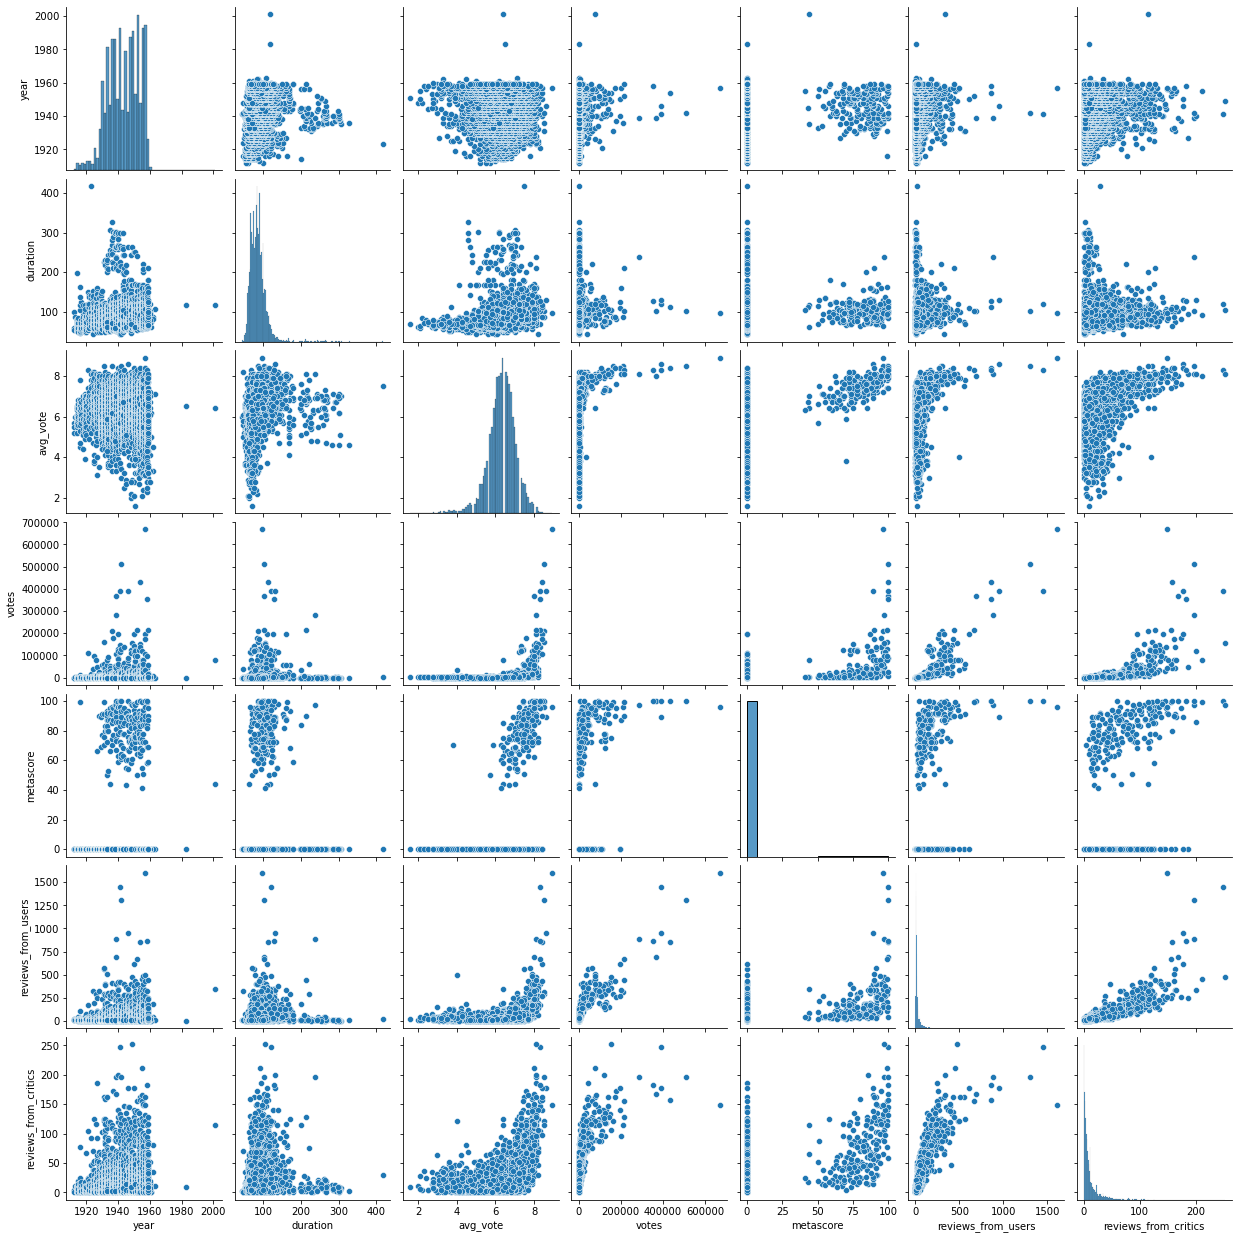

In [5]:
# pairwise scatter plot

plt.figure(figsize=(20, 10))
sns.pairplot(movies_numeric)
plt.show()

In [6]:
# correlation matrix
cor = movies_numeric.corr()
cor

,year,duration,avg_vote,votes,metascore,reviews_from_users,reviews_from_critics
year,1.000000,0.153671,-0.031377,0.041692,0.030114,0.083356,0.094029
duration,0.153671,1.000000,0.293565,0.113937,0.122976,0.175774,0.180640
avg_vote,-0.031377,0.293565,1.000000,0.256873,0.259915,0.362601,0.409470
votes,0.041692,0.113937,0.256873,1.000000,0.525952,0.860142,0.622808
metascore,0.030114,0.122976,0.259915,0.525952,1.000000,0.552879,0.555266
reviews_from_users,0.083356,0.175774,0.362601,0.860142,0.552879,1.000000,0.828423
reviews_from_critics,0.094029,0.180640,0.409470,0.622808,0.555266,0.828423,1.000000


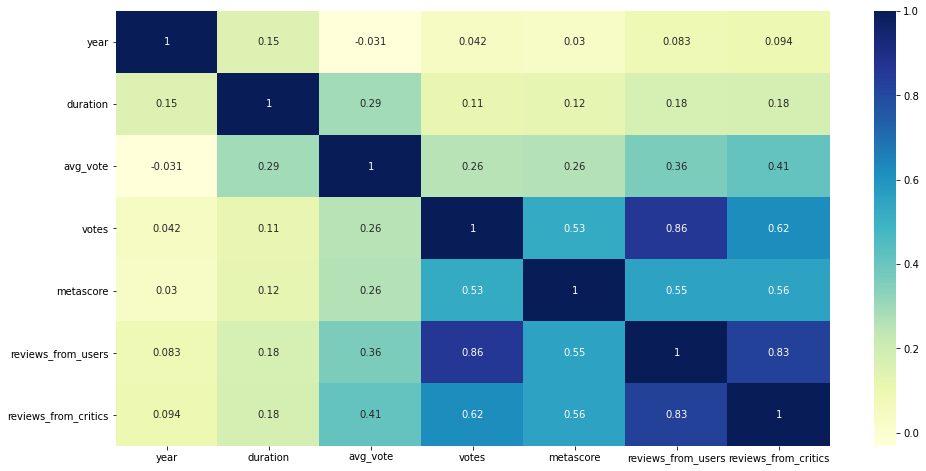

In [7]:
# plotting correlations on a heatmap

# figure size
plt.figure(figsize=(16,8))

# heatmap
sns.heatmap(cor, cmap="YlGnBu", annot=True)
plt.show()

Data Cleaning

In [8]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8024 entries, 0 to 8023
Data columns (total 22 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   imdb_title_id          8024 non-null   object 
 1   title                  8024 non-null   object 
 2   original_title         8024 non-null   object 
 3   year                   8024 non-null   int64  
 4   date_published         8024 non-null   object 
 5   genre                  8024 non-null   object 
 6   duration               8024 non-null   int64  
 7   country                8024 non-null   object 
 8   language               8024 non-null   object 
 9   director               8024 non-null   object 
 10  writer                 8024 non-null   object 
 11  production_company     8024 non-null   object 
 12  actors                 8024 non-null   object 
 13  description            8024 non-null   object 
 14  avg_vote               8024 non-null   float64
 15  vote

In [9]:
# title: first few entries
movies['title'][:30]

0                                             Cleopatra
1     From the Manger to the Cross; or, Jesus of Naz...
2                                           Richard III
3                                        Amore di madre
4                                      Traffic in Souls
5     The Avenging Conscience: or 'Thou Shalt Not Kill'
6                                           The Bargain
7                                            Cinderella
8                                 A Florida Enchantment
9                      His Majesty, the Scarecrow of Oz
10                                           Hypocrites
11                      In the Land of the Head Hunters
12                                   Judith of Bethulia
13                             The Patchwork Girl of Oz
14                                The Perils of Pauline
15                                        The Squaw Man
16                               La madonnina del porto
17                                        The Vi